In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [53]:
def hot_enocding(x,column):
    encoding_column = pd.get_dummies(x[column], prefix=column)
    print(encoding_column.columns)
    x = x.drop(column, axis=1)
    x = x.join(encoding_column)
    return x
    
def custom_encoding(y):
    mapping = {"Standard":1,"Good":2,"Poor":0,"Bad":0,'NM':0,"No":1,"Yes":2}
    y = y.map(mapping)
    return y

In [20]:
x = pd.read_csv("../csv/NM.csv")

In [21]:
unique = x['Type_of_Loan'].unique()
res =set()
# create column for every unique value
for i in unique:
    split_unique = i.split(",")
    for j in split_unique:
        strpe_replace = j.replace("and","")
        stripe_j = strpe_replace.strip()
        res.add(stripe_j)
for i in res:
    x[i] = x['Type_of_Loan'].str.contains(i)
    
x = x.drop(['Type_of_Loan'], axis=1)


In [22]:
features = ['Personal Loan', 'Home Equity Loan', 'Payday Loan', 'Debt Consolidation Loan', 'Mortgage Loan', 'Auto Loan', 'Student Loan', 'Not Specified', 'Credit-Builder Loan']
df = x[features]
# Define a custom function to identify the loan type
def identify_loan_type(row):
    # Initialize an empty list to store loan types
    loan_types = []
    
    # Loop through columns to find which loan types are True
    for column in row.index:
        if row[column]:
            loan_types.append(column)
    
    # If loan types are found, concatenate them with ',' as a separator
    if loan_types:
        return ', '.join(loan_types)
    
    # If none of the loan types are True, return 'No Loan'
    return 'No Loan'

# Apply the custom function to create a new 'Loan_Type' column
x['Type_of_Loan'] = df.apply(identify_loan_type, axis=1)
x = x.drop(features, axis=1)
print(len(x['Type_of_Loan'].unique()))

507


In [23]:
x["Payment_of_Min_Amount"]=custom_encoding(x["Payment_of_Min_Amount"])


NameError: name 'custom_encoding' is not defined

In [58]:
x["Credit_Mix"]= custom_encoding(x["Credit_Mix"])


In [59]:
x["Payment_Behaviour"]=x["Payment_Behaviour"].replace("Low_spent_Small_value_payments",1)
x["Payment_Behaviour"]=x["Payment_Behaviour"].replace("Low_spent_Medium_value_payments",2)
x["Payment_Behaviour"]=x["Payment_Behaviour"].replace("Low_spent_Large_value_payments",3)
x["Payment_Behaviour"]=x["Payment_Behaviour"].replace("High_spent_Small_value_payments",4)
x["Payment_Behaviour"]=x["Payment_Behaviour"].replace("High_spent_Medium_value_payments",5)
x["Payment_Behaviour"]=x["Payment_Behaviour"].replace("High_spent_Large_value_payments",6)



In [24]:
# get data as dictionary type with number as value
codes = x['Type_of_Loan'].astype('category')
# make value as key and key as value
codes = dict(enumerate(codes.cat.categories, 0))    
# make value as key and key as value
codes = {value:key for key, value in codes.items()}
# replace the value with the number
# x['Type_of_Loan'] = x['Type_of_Loan'].astype('category').cat.codes
# print the dictionary
print(codes)
print(x['Type_of_Loan'].head())
print(x['Type_of_Loan'].tail())


{'Auto Loan': 0, 'Auto Loan, Credit-Builder Loan': 1, 'Auto Loan, Not Specified': 2, 'Auto Loan, Not Specified, Credit-Builder Loan': 3, 'Auto Loan, Student Loan': 4, 'Auto Loan, Student Loan, Credit-Builder Loan': 5, 'Auto Loan, Student Loan, Not Specified': 6, 'Auto Loan, Student Loan, Not Specified, Credit-Builder Loan': 7, 'Credit-Builder Loan': 8, 'Debt Consolidation Loan': 9, 'Debt Consolidation Loan, Auto Loan': 10, 'Debt Consolidation Loan, Auto Loan, Credit-Builder Loan': 11, 'Debt Consolidation Loan, Auto Loan, Not Specified': 12, 'Debt Consolidation Loan, Auto Loan, Not Specified, Credit-Builder Loan': 13, 'Debt Consolidation Loan, Auto Loan, Student Loan': 14, 'Debt Consolidation Loan, Auto Loan, Student Loan, Credit-Builder Loan': 15, 'Debt Consolidation Loan, Auto Loan, Student Loan, Not Specified': 16, 'Debt Consolidation Loan, Auto Loan, Student Loan, Not Specified, Credit-Builder Loan': 17, 'Debt Consolidation Loan, Credit-Builder Loan': 18, 'Debt Consolidation Loan, M

In [25]:
x['Occupation'] = x['Occupation'].astype('category').cat.codes
x["Type_of_Loan"] =x['Type_of_Loan'].astype('category').cat.codes

print(x['Type_of_Loan'].unique())

[295   8   2 185 251  41 187 178   6 262 245 253 501 358   7 101 503 488
 169 210   9 182 505 228  50  63 190 212  42 250 229 335 288 152 344 179
 362 302 477 389 490 188 359 499 204  90 469   0 349 352 422  23 427 166
 246 303 139 120 313 104 183 340 480 165 446  87 192 447   4 252 436  34
 236 414 184  52 435  80 289 298  31  46 219  71  18  14 181   3 197 405
 244  10 194  70 363 223 239 282 415   1 472  99 168 257 176 147 425  79
  51 497 348  96 369 417  25  77 233 143 293 196 260 506 361 160  32 305
 234  95 337 230 133  36  83 110 392 498 449 416 434 243 268 403 261 353
 504 242 473 486 172 198  84 201 241 426 102  37 443 487 382 226 186 109
 225  97 131 171  59  35 345 125 279 161 437 400   5 474 471  85 373 336
 156 272 314  65 283  53 167 123 135 466 404  30 406 150 331 214 495 199
 270  89  61  93  29 309 291 493 386 273 390 475 256 308 148 316 467 248
 134  19 430  28 445 154 410 374  40 394 343 180 397 173 249 113 177 304
 413 145 144 407 263 312  43 247 450  47 107 418 26

In [18]:
print(x['Type_of_Loan'].head())
print(x['Type_of_Loan'].tail())

0    295
1    295
2    295
3    295
4    295
Name: Type_of_Loan, dtype: int16
99995    4
99996    4
99997    4
99998    4
99999    4
Name: Type_of_Loan, dtype: int16


In [61]:
import scipy.stats as stats
remove_column = []
for col in x.columns:
    contingency_table = pd.crosstab(x[col],x['Credit_Score'])
    # Apply the chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"Chi-square test results for {col}: {chi2} {p} {dof}")
    if p > 0.05 or chi2 <1000:
        print(f"p-value is {p}. We fail to reject the null hypothesis at 5% significance level.")
        remove_column.append(col)
    
    # print(f"Expected frequencies table:\n{expected}\n")
print(remove_column)

Chi-square test results for Month: 201.80530639299857 2.349409913674008e-35 14
p-value is 2.349409913674008e-35. We fail to reject the null hypothesis at 5% significance level.
Chi-square test results for Age: 4828.101880635831 0.0 84
Chi-square test results for Occupation: 180.68588839512742 2.907103747503745e-24 28
p-value is 2.907103747503745e-24. We fail to reject the null hypothesis at 5% significance level.
Chi-square test results for Annual_Income: 133623.4399425393 0.0 24974
Chi-square test results for Monthly_Inhand_Salary: 135483.84290061373 0.0 26480
Chi-square test results for Num_Bank_Accounts: 20826.586463379506 0.0 22
Chi-square test results for Num_Credit_Card: 23887.92099006035 0.0 22
Chi-square test results for Interest_Rate: 33933.23666458852 0.0 66
Chi-square test results for Num_of_Loan: 15786.228470555605 0.0 18
Chi-square test results for Delay_from_due_date: 24611.88777896807 0.0 124
Chi-square test results for Num_of_Delayed_Payment: 18937.829539556576 0.0 50
C

In [62]:
print(len(x['Type_of_Loan'].unique()))

507


In [43]:
x.drop(remove_column,axis=1,inplace=True)
x.to_csv("credit_score_clean_encoded.csv",index=False)

In [32]:
loan = ['Personal Loan', 'Home Equity Loan', 'Auto Loan', 'Debt Consolidation Loan', 'Not Specified', 'Payday Loan', 'Student Loan', 'Mortgage Loan', 'Credit-Builder Loan']
x_loan = x[loan]
boolean_counts = x_loan.apply(pd.Series.value_counts)

# Create a clustered bar chart
fig, ax = plt.subplots(figsize=(10, 6))
x_len = np.arange(len(loan))
width = 0.4

ax.bar(x_len - width/2, boolean_counts.loc[False], width, label='False')
ax.bar(x_len + width/2, boolean_counts.loc[True], width, label='True')

ax.set_title('Counts of True/False in Loan Types')
ax.set_xlabel('Loan Types')
ax.set_ylabel('Count')
ax.set_xticks(x_len)
ax.set_xticklabels(loan, rotation=45, ha='right')
ax.legend(title='Values', loc='upper right')

plt.tight_layout()
plt.show()

KeyError: "None of [Index(['Personal Loan', 'Home Equity Loan', 'Auto Loan',\n       'Debt Consolidation Loan', 'Not Specified', 'Payday Loan',\n       'Student Loan', 'Mortgage Loan', 'Credit-Builder Loan'],\n      dtype='object')] are in the [columns]"

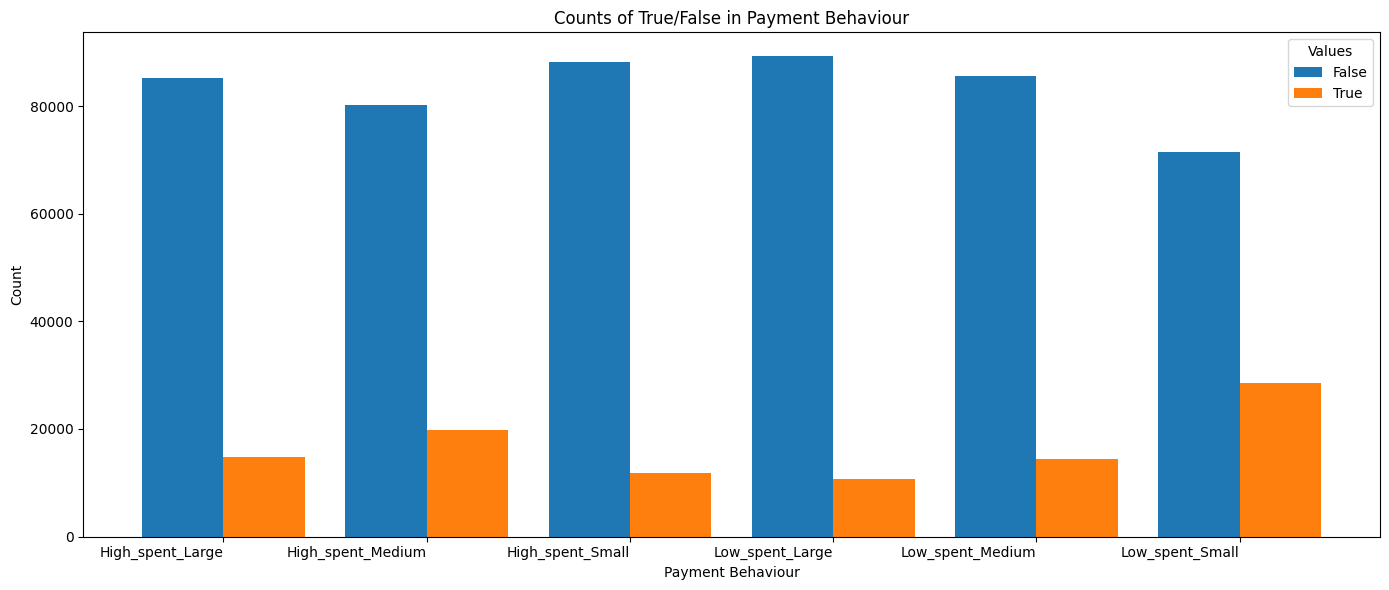

In [ ]:
pehav = ['Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments']

x_loan = x[pehav]
replace_pehave = [x.replace('Payment_Behaviour_', '') for x in pehav]
replace_pehave = [x.replace('_value_payments', '') for x in replace_pehave]
pehav = replace_pehave
# replace all Payment_Behaviour_ and _value_payments with empty string
boolean_counts = x_loan.apply(pd.Series.value_counts)

# Create a clustered bar chart
fig, ax = plt.subplots(figsize=(14, 6))
x_len = np.arange(len(pehav))
width = 0.4

ax.bar(x_len - width/2, boolean_counts.loc[False], width, label='False')
ax.bar(x_len + width/2, boolean_counts.loc[True], width, label='True')

ax.set_title('Counts of True/False in Payment Behaviour')
ax.set_xlabel('Payment Behaviour')
ax.set_ylabel('Count')
ax.set_xticks(x_len)
ax.set_xticklabels(pehav, ha='right')
ax.legend(title='Values', loc='upper right')

plt.tight_layout()
plt.show()

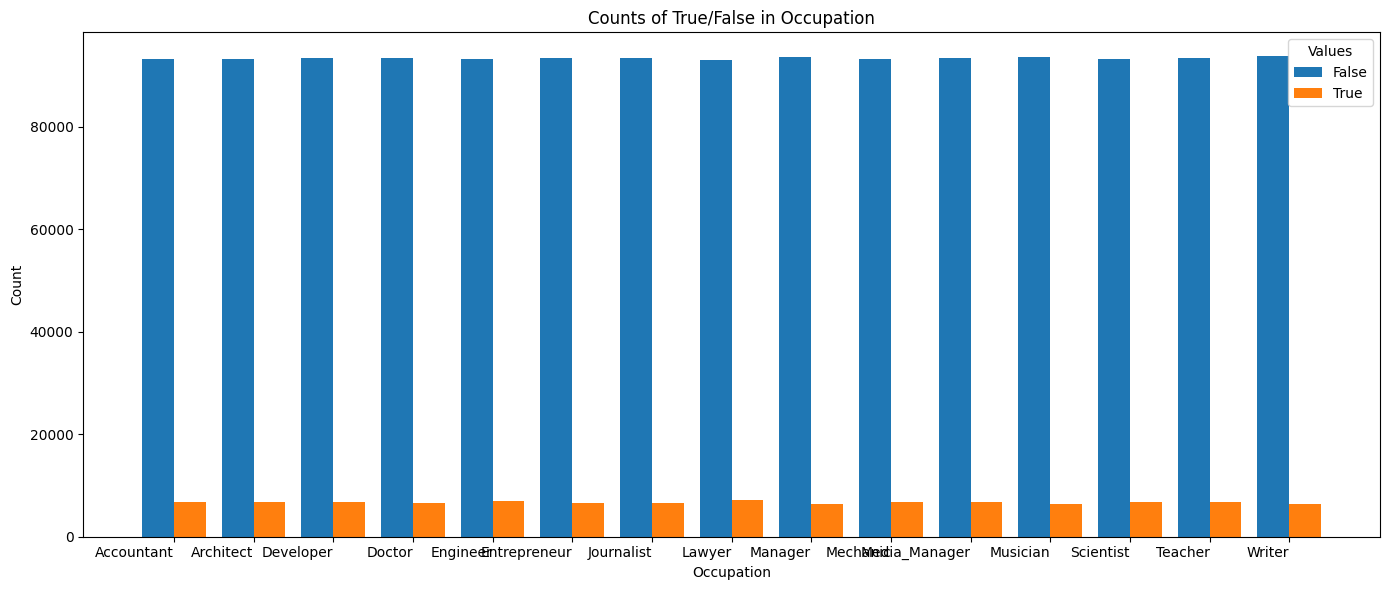

In [ ]:
pehav = ['Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer']

x_loan = x[pehav]
replace_pehave = [x.replace('Occupation_', '') for x in pehav]
pehav = replace_pehave
# replace all Payment_Behaviour_ and _value_payments with empty string
boolean_counts = x_loan.apply(pd.Series.value_counts)

# Create a clustered bar chart
fig, ax = plt.subplots(figsize=(14, 6))
x_len = np.arange(len(pehav))
width = 0.4

ax.bar(x_len - width/2, boolean_counts.loc[False], width, label='False')
ax.bar(x_len + width/2, boolean_counts.loc[True], width, label='True')

ax.set_title('Counts of True/False in Occupation')
ax.set_xlabel('Occupation')
ax.set_ylabel('Count')
ax.set_xticks(x_len)
ax.set_xticklabels(pehav, ha='right')
ax.legend(title='Values', loc='upper right')

plt.tight_layout()
plt.show()

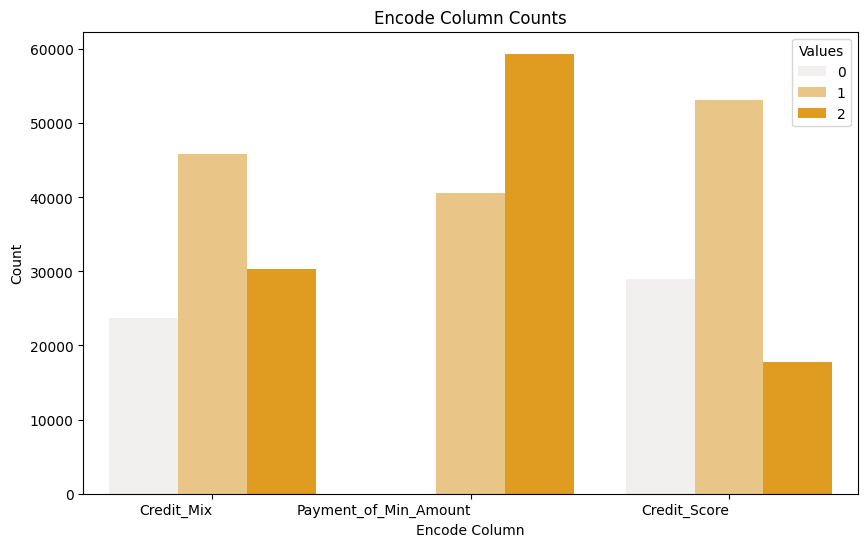

In [ ]:
encode_column = ['Credit_Mix','Payment_of_Min_Amount','Credit_Score']
# Create a clustered bar chart
fig, ax = plt.subplots(figsize=(10, 6))
x_len = np.arange(len(encode_column))
width = 0.4
sns.countplot(x="variable", hue="value", data=pd.melt(x[encode_column]),color="orange")
ax.set_title("Encode Column Counts")
ax.set_xlabel('Encode Column')
ax.set_ylabel('Count')
ax.set_xticks(x_len)
ax.set_xticklabels(encode_column, ha='right')
ax.legend(title='Values', loc='upper right')
